In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
raw_data = pd.read_csv(r"F:\Data_Science_Jupyter_Files\yellow_tripdata.csv")

In [4]:
raw_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               41202 non-null  int64  
 1   passenger_count        41202 non-null  int64  
 2   trip_distance          41202 non-null  float64
 3   RatecodeID             41202 non-null  int64  
 4   store_and_fwd_flag     41202 non-null  int64  
 5   PULocationID           41202 non-null  int64  
 6   DOLocationID           41202 non-null  int64  
 7   payment_type           41202 non-null  int64  
 8   fare_amount            41202 non-null  float64
 9   mta_tax                41202 non-null  float64
 10  tolls_amount           41202 non-null  float64
 11  improvement_surcharge  41202 non-null  int64  
 12  tip_amount             41202 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


In [6]:
raw_data.isnull().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
mta_tax                  0
tolls_amount             0
improvement_surcharge    0
tip_amount               0
dtype: int64

In [7]:
raw_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
count,41202.0,41202.000000,41202.000000,41202.000000,41202.000000,41202.000000,41202.000000,41202.0,41202.000000,41202.000000,41202.000000,41202.000000,41202.000000
mean,2.0,1.633926,18.384928,2.025411,0.999393,132.220475,164.546333,1.0,69.986150,0.491020,5.608198,0.999976,14.107666
std,0.0,0.924250,2.856605,0.461587,0.024625,7.726159,67.901529,0.0,6.184851,0.066404,2.979348,0.004927,5.030619
min,2.0,1.000000,0.000000,1.000000,0.000000,10.000000,3.000000,1.0,3.700000,0.000000,0.000000,0.000000,0.010000
25%,2.0,1.000000,17.370000,2.000000,1.000000,132.000000,113.000000,1.0,70.000000,0.500000,6.940000,1.000000,10.000000
50%,2.0,1.000000,18.180000,2.000000,1.000000,132.000000,163.000000,1.0,70.000000,0.500000,6.940000,1.000000,16.190000
75%,2.0,2.000000,19.380000,2.000000,1.000000,132.000000,231.000000,1.0,70.000000,0.500000,6.940000,1.000000,16.190000
max,2.0,8.000000,189.910000,5.000000,1.000000,264.000000,265.000000,1.0,199.700000,0.500000,57.000000,1.000000,98.000000


<Axes: >

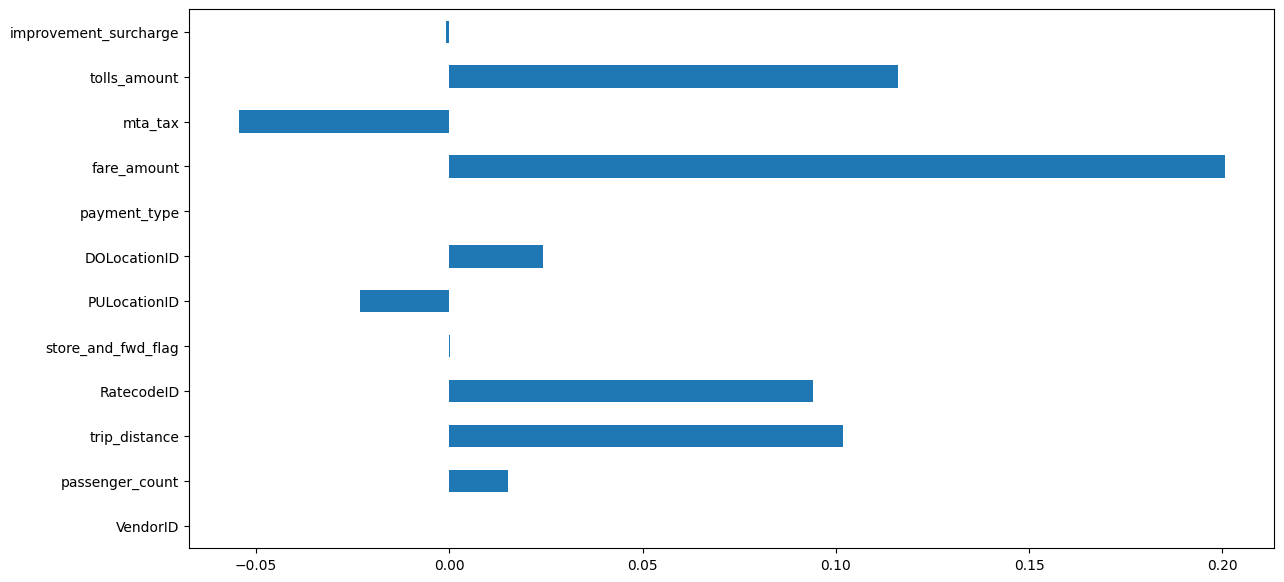

In [11]:
# To understand the dataset a little better, let us plot the correlation of the target variable against the input variables.

correlation_values = raw_data.corr()["tip_amount"].drop("tip_amount")
correlation_values.plot(kind="barh", figsize=(14,7))

### Dataset Preprocessing

In [13]:
# extract the labels from the dataframe
y = raw_data[["tip_amount"]].values.astype("float32")

# drop the target variable from the feature matrix
proc_data = raw_data.drop(["tip_amount"], axis=1)

# get the feature matrix used for training
X = proc_data.values

# normalize the feature matrix
X = normalize(X, axis=1, norm="l1", copy=False)

### Dataset Train/Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Build a Decision Tree Regressor model with Scikit-Learn

In [24]:
from sklearn.tree import DecisionTreeRegressor

# for reproducible output across multiple function calls, set random_state to a given integer value
dt_reg = DecisionTreeRegressor(criterion="squared_error",
                              max_depth = 8,
                              random_state = 35)

In [25]:
# Now lets train our model using the fit method on the DecisionTreeRegressor object providing our training data
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=35)

### Evaluate the Scikit-Learn and Snap ML Decision Tree Regressor Models

In [27]:
# run inference using the sklearn model
y_pred = dt_reg.predict(X_test)

# evaluate mean squared error on the test dataset
mse_score = mean_squared_error(y_test, y_pred)
print("MSE score: {0:.3f}".format(mse_score))

r2_score = dt_reg.score(X_test, y_test)
print("R^2: {0:.3f}".format(r2_score))

MSE score: 24.555
R^2: 0.028


### Decreasing the max_depth parameter to 4

In [28]:
dt_reg_ = DecisionTreeRegressor(criterion = "squared_error",
                              max_depth = 4,
                              random_state = 35)

In [29]:
dt_reg_.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=35)

In [31]:
y_pred_ = dt_reg_.predict(X_test)
mse_score = mean_squared_error(y_test, y_pred_)
print("mse: {0:.3f}".format(mse_score))
r2_score = dt_reg_.score(X_test, y_test)
print("R^2: {0:.3f}".format(r2_score))

mse: 24.412
R^2: 0.034


In [33]:
# Identify the top 3 features with the most effect on the tip_amount
corr_values = raw_data.corr()["tip_amount"].drop("tip_amount")
abs(corr_values).sort_values(ascending=False)[:3]

fare_amount      0.200638
tolls_amount     0.116172
trip_distance    0.101819
Name: tip_amount, dtype: float64